In [590]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [849]:
frame2015 = pd.read_csv("../DataSet/2015-building-energy-benchmarking.csv")
frame2016 = pd.read_csv("../DataSet/2016-building-energy-benchmarking.csv")
dataF = frame2015.append(frame2016)
dataF

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2015      NonResidential               Hotel   
1                 2      2015      NonResidential               Hotel   
2                 3      2015      NonResidential               Hotel   
3                 5      2015      NonResidential               Hotel   
4                 8      2015      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName TaxParcelIdentificationNumber  \
0                    MAYFLOWER PARK HOTEL                     659000030   
1                         PARAMOUNT HOTEL                     659000220   
2                            WESTIN HOTEL                     659000475   
3                               HOTEL MAX                     659000640   
4                   WARWICK SEATTLE HOTEL                     659000970   
...                                   ...                           ...   
3371                Horticulture building                    1624049080   
3372  International district/Chinatown CC                    3558300000   
3373                      Queen Anne Pool                    1794501150   
3374          South Park Community Center                    7883603155   
3375          Van Asselt Community Center                    7857002030   

                                               Location  CouncilDistrictCode  \
0     {'latitude': '47.61219025', 'longitude': '-122...                    7   
1     {'latitude': '47.61310583', 'longitude': '-122...                    7   
2     {'latitude': '47.61334897', 'longitude': '-122...                    7   
3     {'latitude': '47.61421585', 'longitude': '-122...                    7   
4     {'latitude': '47.6137544', 'longitude': '-122....                    7   
...                                                 ...                  ...   
3371                                                NaN                    2   
3372                                                NaN                    2   
3373                                                NaN                    7   
3374                                                NaN                    1   
3375                                                NaN                    2   

               Neighborhood  YearBuilt  ...  Zip Codes           Address  \
0                  DOWNTOWN       1927  ...    18081.0               NaN   
1                  DOWNTOWN       1996  ...    18081.0               NaN   
2                  DOWNTOWN       1969  ...    18081.0               NaN   
3                  DOWNTOWN       1926  ...    18081.0               NaN   
4                  DOWNTOWN       1980  ...    19576.0               NaN   
...                     ...        ...  ...        ...               ...   
3371       GREATER DUWAMISH       1990  ...        NaN  1600 S Dakota St   
3372               DOWNTOWN       2004  ...        NaN     719 8th Ave S   
3373  MAGNOLIA / QUEEN ANNE       1974  ...        NaN    1920 1st Ave W   
3374       GREATER DUWAMISH       1989  ...        NaN    8319 8th Ave S   
3375       GREATER DUWAMISH       1938  ...        NaN  2820 S Myrtle St   

         City  State  ZipCode  Latitude  Longitude  Comments  \
0         NaN    NaN      NaN       NaN        NaN       NaN   
1         NaN    NaN      NaN       NaN        NaN       NaN   
2         NaN    NaN      NaN       NaN        NaN       NaN   
3         NaN    NaN      NaN       NaN        NaN       NaN   
4         NaN    NaN      NaN     

In [850]:
#dataF = pd.read_csv("sourceDataSet.csv", delimiter=";")
dataF.drop_duplicates()
#Let's only keep data for seattle measures
#dataF = dataF[dataF["City"] == "Seattle"]
#GFA is gross floor area
dataF['GHGEmissionsIntensity(kgCO2e/ft2)']
dataF['GHGEmissionsIntensity(kgCO2e/ft2)'].count()

3330

In [851]:
nonNullRate = []
for col in dataF.columns: 
    #we are counting the row with data and without Null or NaN over the number of rows
    nonNullRate.append({"columns": col, "type": str(dataF[col].dtypes) ,"filledRatio": round((dataF[col].count()/dataF.shape[0])*100, 3), "nbValues": dataF[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
lessThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] < 10]
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] > 10]
lessThanOnePercentColumns.describe
len(list(lessThanOnePercentColumns["columns"]))
#moreThanOnePercentColumns[moreThanOnePercentColumns["columns"] == 'GHGEmissions(MetricTonsCO2e)']
moreThanOnePercentColumns

columns     type  filledRatio  \
0                                       OSEBuildingID    int64      100.000   
1                                            DataYear    int64      100.000   
2                                        BuildingType   object      100.000   
3                                 PrimaryPropertyType   object      100.000   
4                                        PropertyName   object      100.000   
5                       TaxParcelIdentificationNumber   object       99.970   
6                                            Location   object       49.732   
7                                 CouncilDistrictCode    int64      100.000   
8                                        Neighborhood   object      100.000   
9                                           YearBuilt    int64      100.000   
10                                  NumberofBuildings  float64       99.881   
11                                     NumberofFloors  float64       99.881   
12                                   PropertyGFATotal    int64      100.000   
13                                 PropertyGFAParking    int64      100.000   
14                             PropertyGFABuilding(s)    int64      100.000   
15                          ListOfAllPropertyUseTypes   object       97.975   
16                             LargestPropertyUseType   object       97.677   
17                          LargestPropertyUseTypeGFA  float64       97.677   
18                       SecondLargestPropertyUseType   object       48.213   
19                    SecondLargestPropertyUseTypeGFA  float64       48.213   
20                        ThirdLargestPropertyUseType   object       17.213   
21                     ThirdLargestPropertyUseTypeGFA  float64       17.213   
23                                    ENERGYSTARScore  float64       75.834   
24                                   SiteEUI(kBtu/sf)  float64       99.747   
25                                 SiteEUIWN(kBtu/sf)  float64       99.762   
26                                 SourceEUI(kBtu/sf)  float64       99.717   
27                               SourceEUIWN(kBtu/sf)  float64       99.717   
28                                SiteEnergyUse(kBtu)  float64       99.777   
29                              SiteEnergyUseWN(kBtu)  float64       99.762   
30                                     SteamUse(kBtu)  float64       99.717   
31                                   Electricity(kWh)  float64       99.717   
32                                  Electricity(kBtu)  float64       99.717   
33                                 NaturalGas(therms)  float64       99.717   
34                                   NaturalGas(kBtu)  float64       99.717   
35                                 OtherFuelUse(kBtu)  float64       49.583   
36                       GHGEmissions(MetricTonsCO2e)  float64       49.583   
37                  GHGEmissionsIntensity(kgCO2e/ft2)  float64       49.583   
38                                        DefaultData   object       99.985   
40                                   ComplianceStatus   object      100.000   
43  Seattle Police Department Micro Community Poli...  float64       49.702   
45                                          SPD Beats  float64       49.702   
46                                          Zip Codes  float64       49.732   
47                                            Address   object       50.268   
48                                               City   object       50.268   
49                                              State   object       50.268   
50                                            ZipCode  float64       50.030   
51                                           Latitude  float64       50.268   
52                                          Longitude  float64       50.268   
54                                  TotalGHGEmissions  float64       50.134   
55                              GHGEmissionsIntensity  float64       50.134   

    nbValues  
0

In [852]:
#pretraitement de Neighborhood
#print(np.unique(dataF["Neighborhood"].values))
classifier = OneHotEncoder()
dataF["Neighborhood"] = dataF["Neighborhood"].str.lower()
dataF["Neighborhood"] = dataF["Neighborhood"].str.replace(" neighborhoods", "")
dataF["Neighborhood"] = dataF["Neighborhood"].str.strip()
dataF["Neighborhood"] = dataF["Neighborhood"].replace(np.nan, "other")
#NeighborhoodStd = classifier.fit_transform(dataF["Neighborhood"].values.reshape(-1, 1))
#dataF["NeighborhoodStd"]  = NeighborhoodStd
dataF["NeighborhoodInt"]  = dataF["Neighborhood"]
uniqueNeighbourhouds = list(np.unique(dataF["Neighborhood"].values))
for key in range(0, len(uniqueNeighbourhouds)):
    dataF["NeighborhoodInt"] = dataF["NeighborhoodInt"].replace(uniqueNeighbourhouds[key], key)
#print(list(np.unique(dataF["NeighborhoodInt"].values)))

In [895]:
#PrimaryPropertyType
dataF["PrimaryPropertyType"] = dataF["PrimaryPropertyType"].str.lower()
dataF["PrimaryPropertyType"] = dataF["PrimaryPropertyType"].str.replace(" neighborhoods", "")
dataF["PrimaryPropertyType"] = dataF["PrimaryPropertyType"].str.strip()
dataF["PrimaryPropertyType"] = dataF["PrimaryPropertyType"].replace(np.nan, "other")
dataF["PrimaryPropertyType"] = dataF["PrimaryPropertyType"].replace(" / ", "/")
uniquePropertyType = list(np.unique(dataF["PrimaryPropertyType"].values))
dataF["PrimaryPropertyTypeInt"]  = dataF["PrimaryPropertyType"] 
for key in range(0, len(uniquePropertyType)):
    print(uniquePropertyType[key])
    dataF["PrimaryPropertyTypeInt"] = dataF["PrimaryPropertyTypeInt"].replace(uniquePropertyType[key], key)
print(list(np.unique(dataF["PrimaryPropertyTypeInt"].values)))


college/university
distribution center
high-rise multifamily
hospital
hotel
k-12 school
laboratory
large office
low-rise multifamily
medical office
mid-rise multifamily
mixed use property
non-refrigerated warehouse
office
other
refrigerated warehouse
residence hall
residence hall/dormitory
restaurant
retail store
self-storage facility
senior care community
small- and mid-sized office
sps-district k-12
supermarket / grocery store
supermarket/grocery store
university
warehouse
worship facility
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


<AxesSubplot:>

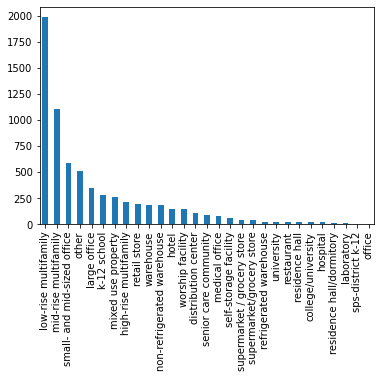

In [897]:
dataF['PrimaryPropertyType'].value_counts().plot(kind='bar')

<AxesSubplot:>

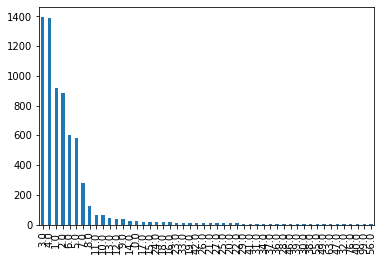

In [853]:
dataF['NumberofFloors'].value_counts().plot(kind='bar')

In [683]:
#LargestPropertyUseType already integers
#print(list(dataF["LargestPropertyUseType"].values))
#dataF["LargestPropertyUseType"] = dataF["LargestPropertyUseType"].str
#dataF["LargestPropertyUseType"] = dataF["LargestPropertyUseType"].str.lower()
#dataF["LargestPropertyUseType"] = dataF["LargestPropertyUseType"].str.strip()

#uniquePropertyType = np.unique(dataF["LargestPropertyUseType"].values)
#dataF["LargestPropertyUseType"] = dataF["LargestPropertyUseType"].str.lower()
#dataF["LargestPropertyUseType"] = dataF["LargestPropertyUseType"].str.replace(" neighborhoods", "")
#dataF["LargestPropertyUseType"] = dataF["LargestPropertyUseType"].str.strip()

#dataF["LargestPropertyUseTypeInt"]  = dataF["LargestPropertyUseType"] 
#for key in range(0, len(uniquePropertyType)):
#    print(uniquePropertyType[key])
#    dataF["LargestPropertyUseTypeInt"] = dataF["LargestPropertyUseType"].replace(uniquePropertyType[key], key)
#print(list(np.unique(dataF["PrimaryPropertyTypeInt"].values)))

['campus', 'multifamily hr (10+)', 'multifamily lr (1-4)', 'multifamily mr (5-9)', 'nonresidential', 'nonresidential cos', 'nonresidential wa', 'sps-district k-12']
[0, 1, 2, 3, 4, 5, 6, 7]


<AxesSubplot:>

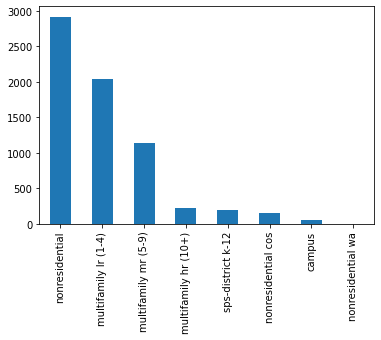

In [896]:
#preprocessing BuildingType

dataF["BuildingType"] = dataF["BuildingType"].str.lower()
dataF["BuildingType"] = dataF["BuildingType"].str.strip()
dataF["BuildingType"] = dataF["BuildingType"].replace(np.nan, "other")
dataF["BuildingTypeInt"] = dataF["BuildingType"]
currentType = list(np.unique(dataF["BuildingType"].values))
print(currentType)
for btypeKey in range(len(currentType)):
    #print(btypeKey)
    dataF["BuildingTypeInt"] = dataF["BuildingTypeInt"].replace(currentType[btypeKey], btypeKey)
print(list(np.unique(dataF["BuildingTypeInt"].values)))
dataF['BuildingType'].value_counts().plot(kind='bar')

<AxesSubplot:>

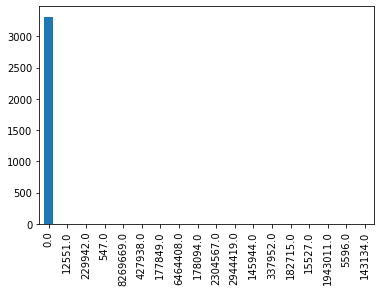

In [922]:
# a lot of columns seems to be string but should be float or integer in fact 
#let's change that. 
nonNullRateFrame.columns.str.contains("kbtu")
kbtusColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kBtu")]
CO2Columns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("CO2")]
kwhColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kWh")]


In [856]:
listToChange = list(kwhColumns['columns'].values) + list(CO2Columns['columns'].values) + list(kbtusColumns['columns'].values)
listToChange = listToChange + ["NaturalGas(therms)", "LargestPropertyUseType", "ListOfAllPropertyUseTypes", "TotalGHGEmissions", "Latitude", "Longitude", "YearBuilt", "ZipCode", "ENERGYSTARScore", "NumberofBuildings", "NumberofFloors", "CouncilDistrictCode", "ListOfAllPropertyUseTypes"]
#listToChange = listToChange.append(list(CO2Columns['columns'].values))#.append(list(kbtusColumns['columns'].values))

# Ajout de la colonne Total KBTU
qui reprend l'ensemble de la consommation du batiment hors variable par surface. 
Ceci peut être interessant pour évaluer la consommation totale par batiment

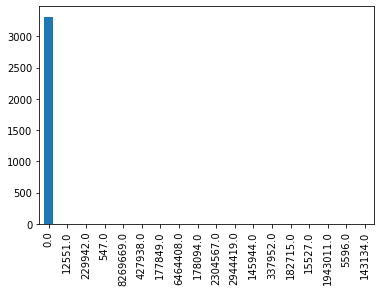

In [924]:
dataF["OtherFuelUse(kBtu)"].value_counts().plot(kind="bar")
list(kbtusColumns['columns'].values).remove("OtherFuelUse(kBtu)")

In [927]:
kbtusColumn = ["SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "Electricity(kBtu)", "NaturalGas(kBtu)"]
totalKbtu = []
for row in range(dataF.shape[0]):
    Kbtu = []
    for column in dataF.columns:
        if column in kbtusColumn and not column.__contains__("/sf") and column != "OtherFuelUse(kBtu)":
            if dataF.iloc[row][column]:
                Kbtu.append(dataF.iloc[row][column])
    totalKbtu.append(sum(Kbtu))
dataF["totalKbtu"] = totalKbtu

0       1.396301e+07
1       1.670863e+07
2       1.462634e+08
3       5.645876e+07
4       2.965845e+07
            ...     
3371    1.699492e+06
3372    1.900552e+06
3373    1.153180e+07
3374    1.438942e+06
3375    2.305792e+06
Name: totalKbtu, Length: 6716, dtype: float64

### Traitement de ENERGYSTARScore et ajout d'une colonne avec les couleurs officiels

In [928]:
#Let's keep only EnergyScore with value <= 100
#cleanDataF = dataF.loc[dataF["ENERGYSTARScore"] <= 100]
#cleanDataF = cleanDataF.loc[cleanDataF["ENERGYSTARScore"] >= 0]
cleanDataF = dataF
cleanDataF["ENERGYSTARScore"] = cleanDataF["ENERGYSTARScore"].replace(np.nan, 111)
cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScore"]
#f = lambda x: "red" if x<25 else x
#cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScoreColor"].map(f)
#print(np.unique(cleanDataF["ENERGYSTARScoreColor"].values))
#cleanDataF["ENERGYSTARScoreColor"] = np.where(cleanDataF["ENERGYSTARScoreColor"]<25, "red", cleanDataF["ENERGYSTARScoreColor"])
#print(np.unique(cleanDataF["ENERGYSTARScoreColor"].values))
#cleanDataF.loc[cleanDataF["ENERGYSTARScoreColor"] > 25 & cleanDataF["ENERGYSTARScoreColor"] <= 75 , 'yellow']
#cleanDataF.loc[cleanDataF["ENERGYSTARScoreColor"] > 75 & cleanDataF["ENERGYSTARScoreColor"] <= 100 , 'green']
#cleanDataF.loc[lambda x: x["ENERGYSTARScore"] in range(25, 75)]

#cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScoreColor"].where(cleanDataF["ENERGYSTARScoreColor"].between(0, 25), "red")
#cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScoreColor"].where(cleanDataF["ENERGYSTARScoreColor"].between(26, 75), "yellow")
#cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScoreColor"].where(cleanDataF["ENERGYSTARScoreColor"].between(76, 100), "green")
#print(list(np.unique(cleanDataF["ENERGYSTARScoreColor"])))

for i in range(0, cleanDataF.shape[0]):
    a = cleanDataF["ENERGYSTARScoreColor"].iloc[i]
    if int(a) >= 0 & int(a) <= 25:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "red"
    if int(a) > 25 & int(a) <= 75:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "yellow"
    if int(a) > 75 & int(a) <= 100:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "green"
    if int(a) == 111: # & int(a) <= 100:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "black"
cleanDataF["ENERGYSTARScoreColor"].value_counts()

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



green     4413
black     1623
yellow     569
red        111
Name: ENERGYSTARScoreColor, dtype: int64

<AxesSubplot:>

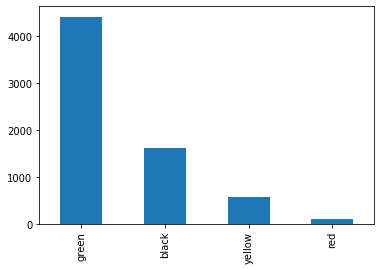

In [929]:
dataF['ENERGYSTARScoreColor'].value_counts().plot(kind='bar')

In [930]:
nonNullRate = []
for col in cleanDataF.columns: 
    #we are counting the row with data and without Null or NaN over the number of rows
    nonNullRate.append({"columns": col, "type": str(cleanDataF[col].dtypes) ,"filledRatio": round((cleanDataF[col].count()/cleanDataF.shape[0])*100, 3), "nbValues": cleanDataF[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
lessThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] < 20]
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] > 20]
lessThanOnePercentColumns.describe
len(list(lessThanOnePercentColumns["columns"]))
moreThanOnePercentColumns

columns     type  filledRatio  \
0                                       OSEBuildingID    int64      100.000   
1                                            DataYear    int64      100.000   
2                                        BuildingType   object      100.000   
3                                 PrimaryPropertyType   object      100.000   
4                                        PropertyName   object      100.000   
5                       TaxParcelIdentificationNumber   object       99.970   
6                                            Location   object       49.732   
7                                 CouncilDistrictCode    int64      100.000   
8                                        Neighborhood   object      100.000   
9                                           YearBuilt    int64      100.000   
10                                  NumberofBuildings  float64       99.881   
11                                     NumberofFloors  float64       99.881   
12                                   PropertyGFATotal    int64      100.000   
13                                 PropertyGFAParking    int64      100.000   
14                             PropertyGFABuilding(s)    int64      100.000   
15                          ListOfAllPropertyUseTypes   object       97.975   
16                             LargestPropertyUseType   object       97.677   
17                          LargestPropertyUseTypeGFA  float64       97.677   
18                       SecondLargestPropertyUseType   object       48.213   
19                    SecondLargestPropertyUseTypeGFA  float64       48.213   
23                                    ENERGYSTARScore  float64      100.000   
24                                   SiteEUI(kBtu/sf)  float64       99.747   
25                                 SiteEUIWN(kBtu/sf)  float64       99.762   
26                                 SourceEUI(kBtu/sf)  float64       99.717   
27                               SourceEUIWN(kBtu/sf)  float64       99.717   
28                                SiteEnergyUse(kBtu)  float64       99.777   
29                              SiteEnergyUseWN(kBtu)  float64       99.762   
30                                     SteamUse(kBtu)  float64       99.717   
31                                   Electricity(kWh)  float64       99.717   
32                                  Electricity(kBtu)  float64       99.717   
33                                 NaturalGas(therms)  float64       99.717   
34                                   NaturalGas(kBtu)  float64       99.717   
35                                 OtherFuelUse(kBtu)  float64       49.583   
36                       GHGEmissions(MetricTonsCO2e)  float64      100.000   
37                  GHGEmissionsIntensity(kgCO2e/ft2)  float64       49.583   
38                                        DefaultData   object       99.985   
40                                   ComplianceStatus   object      100.000   
43  Seattle Police Department Micro Community Poli...  float64       49.702   
45                                          SPD Beats  float64       49.702   
46                                          Zip Codes  float64       49.732   
47                                            Address   object       50.268   
48                                               City   object       50.268   
49                                              State   object       50.268   
50                                            ZipCode  float64       50.030   
51                                           Latitude  float64       50.268   
52                                          Longitude  float64       50.268   
54                                  TotalGHGEmissions  float64       50.134   
55                              GHGEmissionsIntensity  float64       50.134   
56                                    NeighborhoodInt    int64      100.000   
57                                    BuildingTypeInt    int64      100.000   
58               

# traitement de la 'GHGEmissions(MetricTonsCO2e)'

In [931]:
#cleanDataF["GHGEmissions(MetricTonsCO2e)"].value_counts()
#cleanDataF["GHGEmissions(MetricTonsCO2e)"].replace(np.nan, -1).value_counts().to_frame()
cleanDataF["GHGEmissions(MetricTonsCO2e)"] = cleanDataF["GHGEmissions(MetricTonsCO2e)"].replace(np.nan, -1)
cleanDataF["GHGEmissions(MetricTonsCO2e)"].value_counts()

-1.00      3386
 4.65         8
 4.55         6
 3.47         6
 3.54         6
           ... 
 52.79        1
 56.54        1
 22.01        1
 752.57       1
 16.74        1
Name: GHGEmissions(MetricTonsCO2e), Length: 2764, dtype: int64

# Traitement de la colonne OtherFuelUse

In [932]:
cleanDataF["OtherFuelUse(kBtu)"].value_counts().to_frame()

OtherFuelUse(kBtu)
0.0                      3313
12551.0                     1
229942.0                    1
547.0                       1
8269669.0                   1
427938.0                    1
177849.0                    1
6464408.0                   1
178094.0                    1
2304567.0                   1
2944419.0                   1
145944.0                    1
337952.0                    1
182715.0                    1
15527.0                     1
1943011.0                   1
5596.0                      1
143134.0                    1

In [866]:


columnsToBeFiltered = list(moreThanOnePercentColumns["columns"].values)
#columnsToBeFiltered = columnsToBeFiltered  + ["TotalGHGEmissions"]
#columnsToBeFiltered.remove("Latitude")
#columnsToBeFiltered.remove("Longitude")
#columnsToBeFiltered.remove("Location")
#columnsToBeFiltered.remove("ZipCode")
columnsToBeFiltered.remove("BuildingType")
columnsToBeFiltered.remove("TaxParcelIdentificationNumber")
#columnsToBeFiltered.remove("F49")
#columnsToBeFiltered.remove("F51")
#columnsToBeFiltered.remove("F52")
#columnsToBeFiltered.remove("F53")
#columnsToBeFiltered.remove("Comment")
columnsToBeFiltered.remove("DefaultData")
#columnsToBeFiltered.remove('2010 Census Tracts')
#columnsToBeFiltered.remove('Outlier')
#columnsToBeFiltered.remove("F53")
#columnsToBeFiltered.remove("SPD Beats")
columnsToBeFiltered.remove("SecondLargestPropertyUseType")
columnsToBeFiltered.remove("SecondLargestPropertyUseTypeGFA")
columnsToBeFiltered.remove('ComplianceStatus')

#columnsToBeFiltered.remove("ENERGYSTARScoreColor")
#columnsToBeFiltered.remove("File Paths")
columnsToBeFiltered.remove("Seattle Police Department Micro Community Policing Plan Areas")
columnsToBeFiltered.remove("OSEBuildingID")
columnsToBeFiltered.remove("DataYear")
columnsToBeFiltered.remove("PropertyName")
columnsToBeFiltered.remove("CouncilDistrictCode")
#columnsToBeFiltered.remove('City Council Districts')
columnsToBeFiltered

['PrimaryPropertyType',
 'Location',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'SPD Beats',
 'Zip Codes',
 'Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

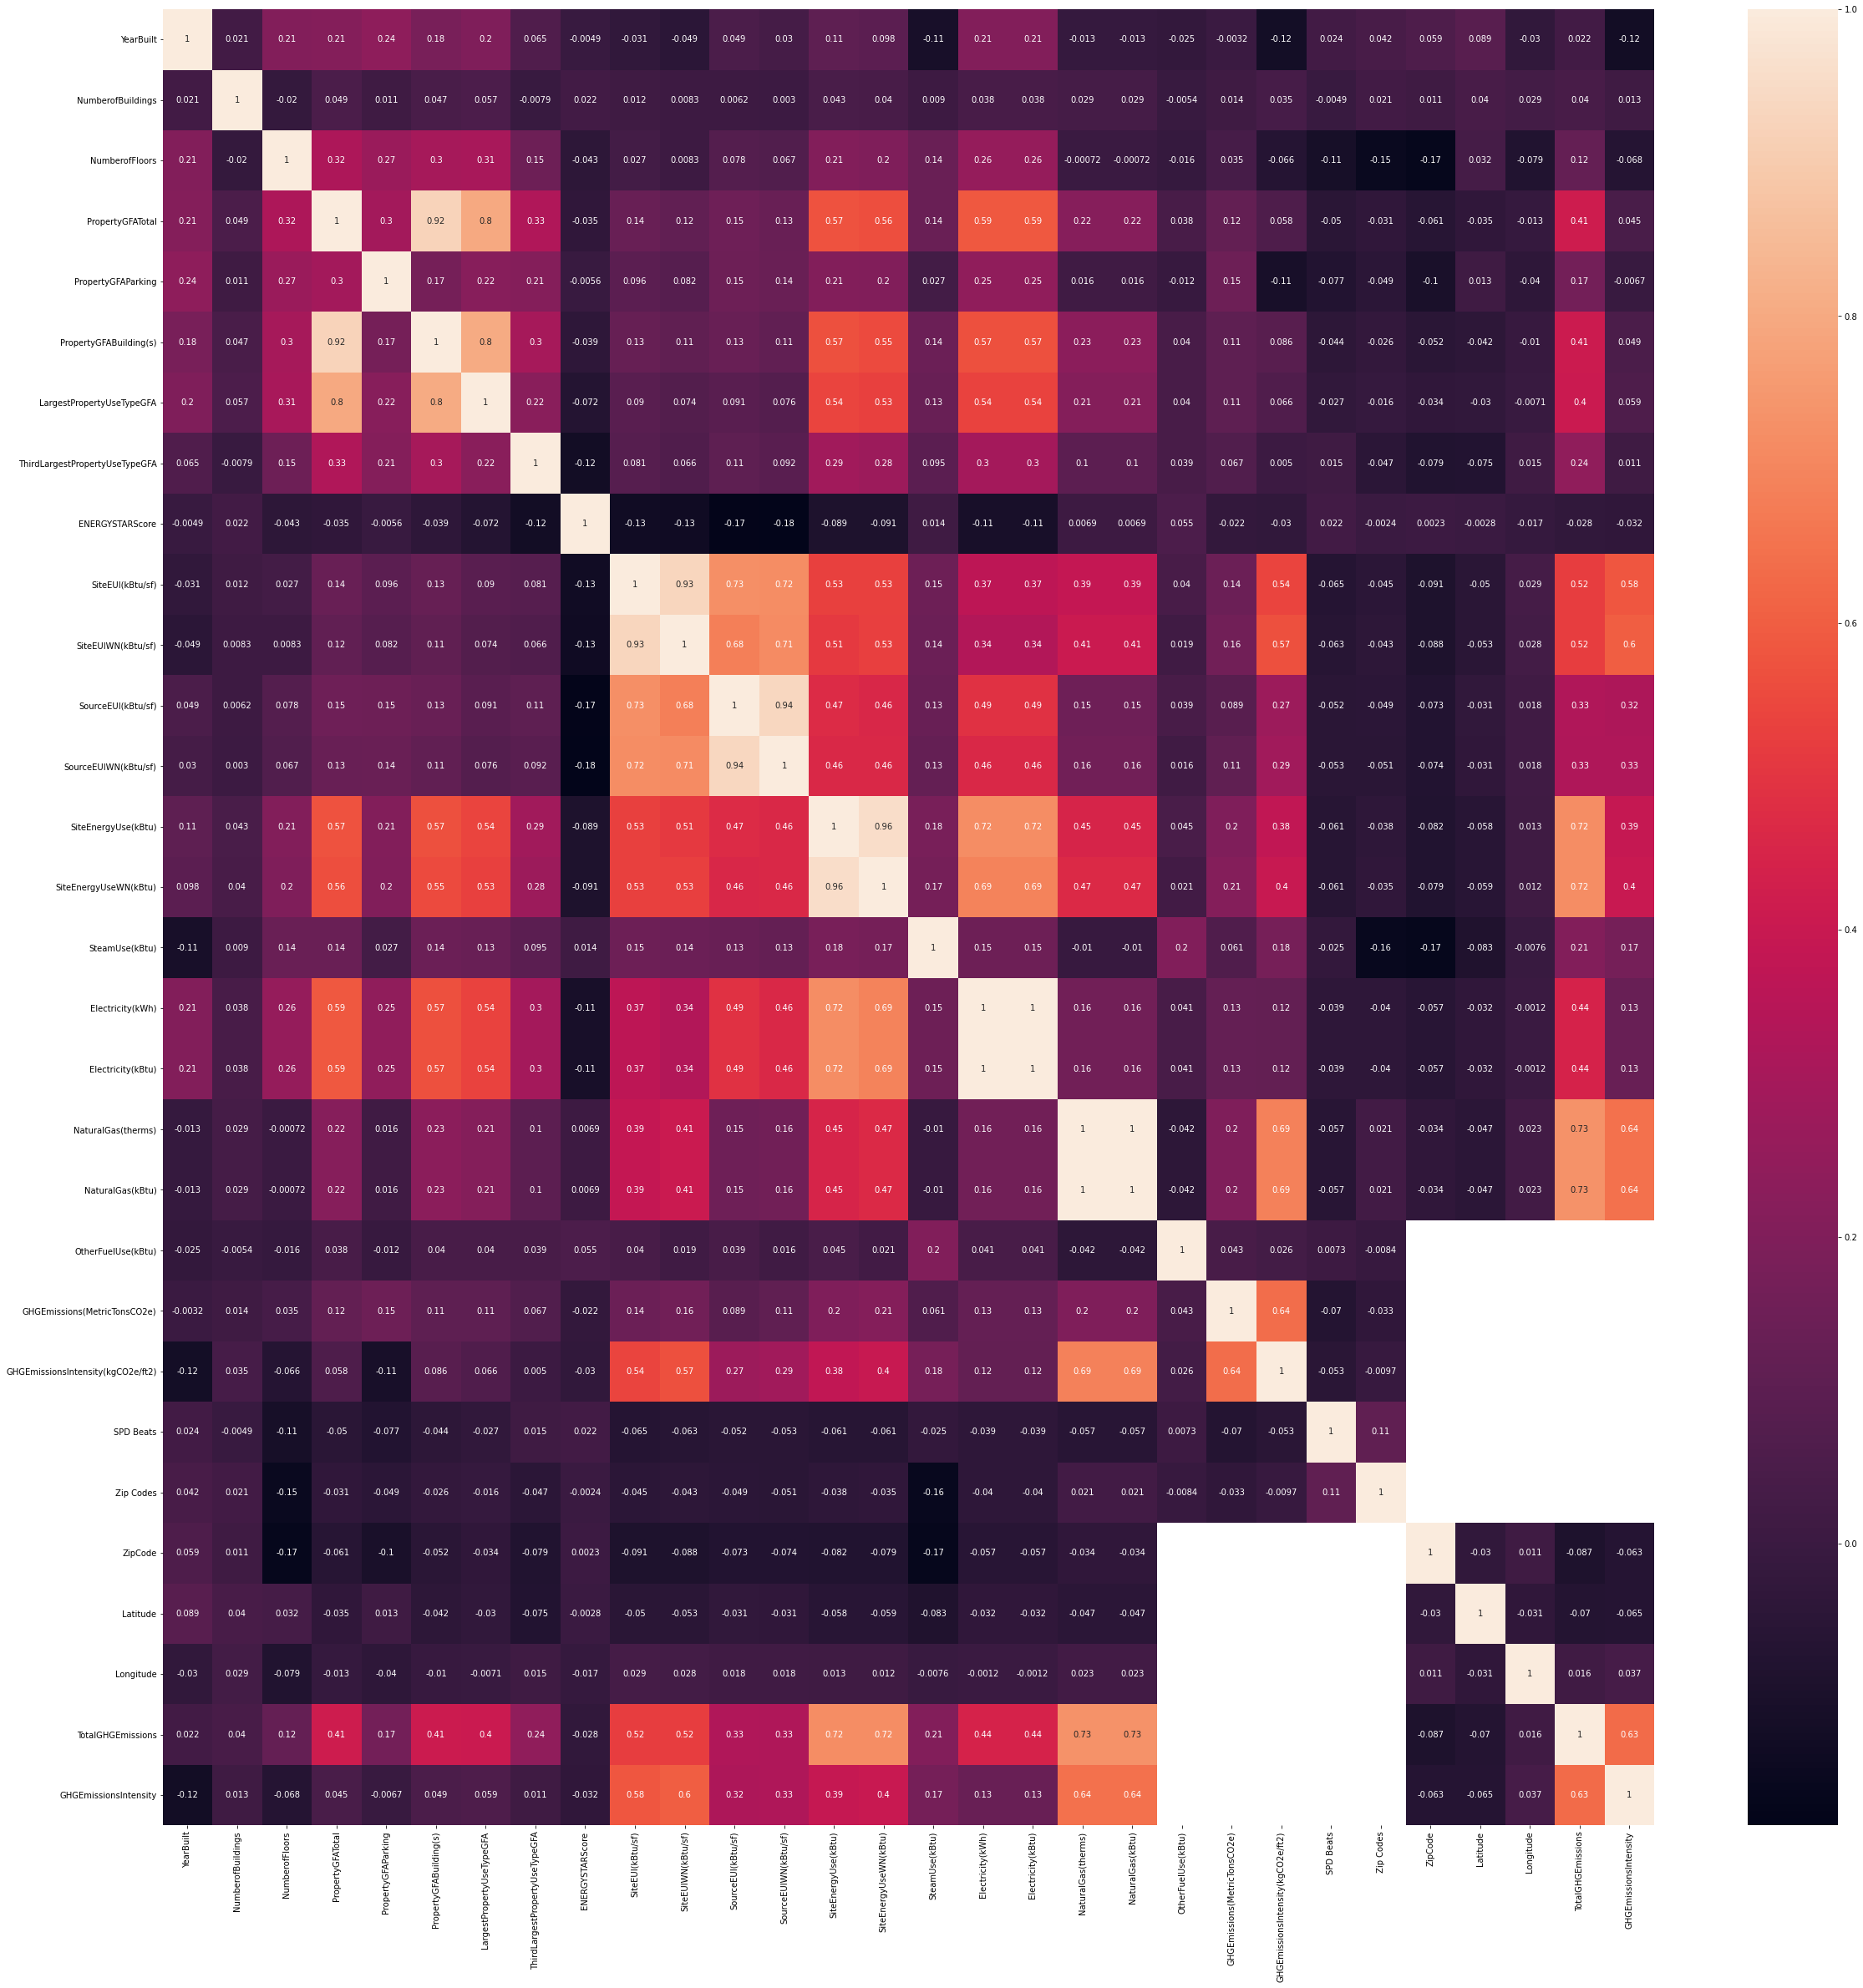

In [933]:
#correlations = dataF.corr(method="kendall")
#correlations = dataF.corr(method="spearman")


correlations = cleanDataF.filter(items=columnsToBeFiltered).corr(method="kendall")
f, ax = plt.subplots(figsize = (40, 40))
#regarder la distance par défault dans heatmap
figure = sns.heatmap(correlations, annot = True).get_figure()
figure.savefig("./Visuals/originalDFheatmap.jpg")

green     4413
black     1623
yellow     569
red        111
Name: ENERGYSTARScoreColor, dtype: int64
-1.00      3386
 4.65         8
 4.55         6
 3.47         6
 3.54         6
           ... 
 52.79        1
 56.54        1
 22.01        1
 752.57       1
 16.74        1
Name: GHGEmissions(MetricTonsCO2e), Length: 2764, dtype: int64
6716


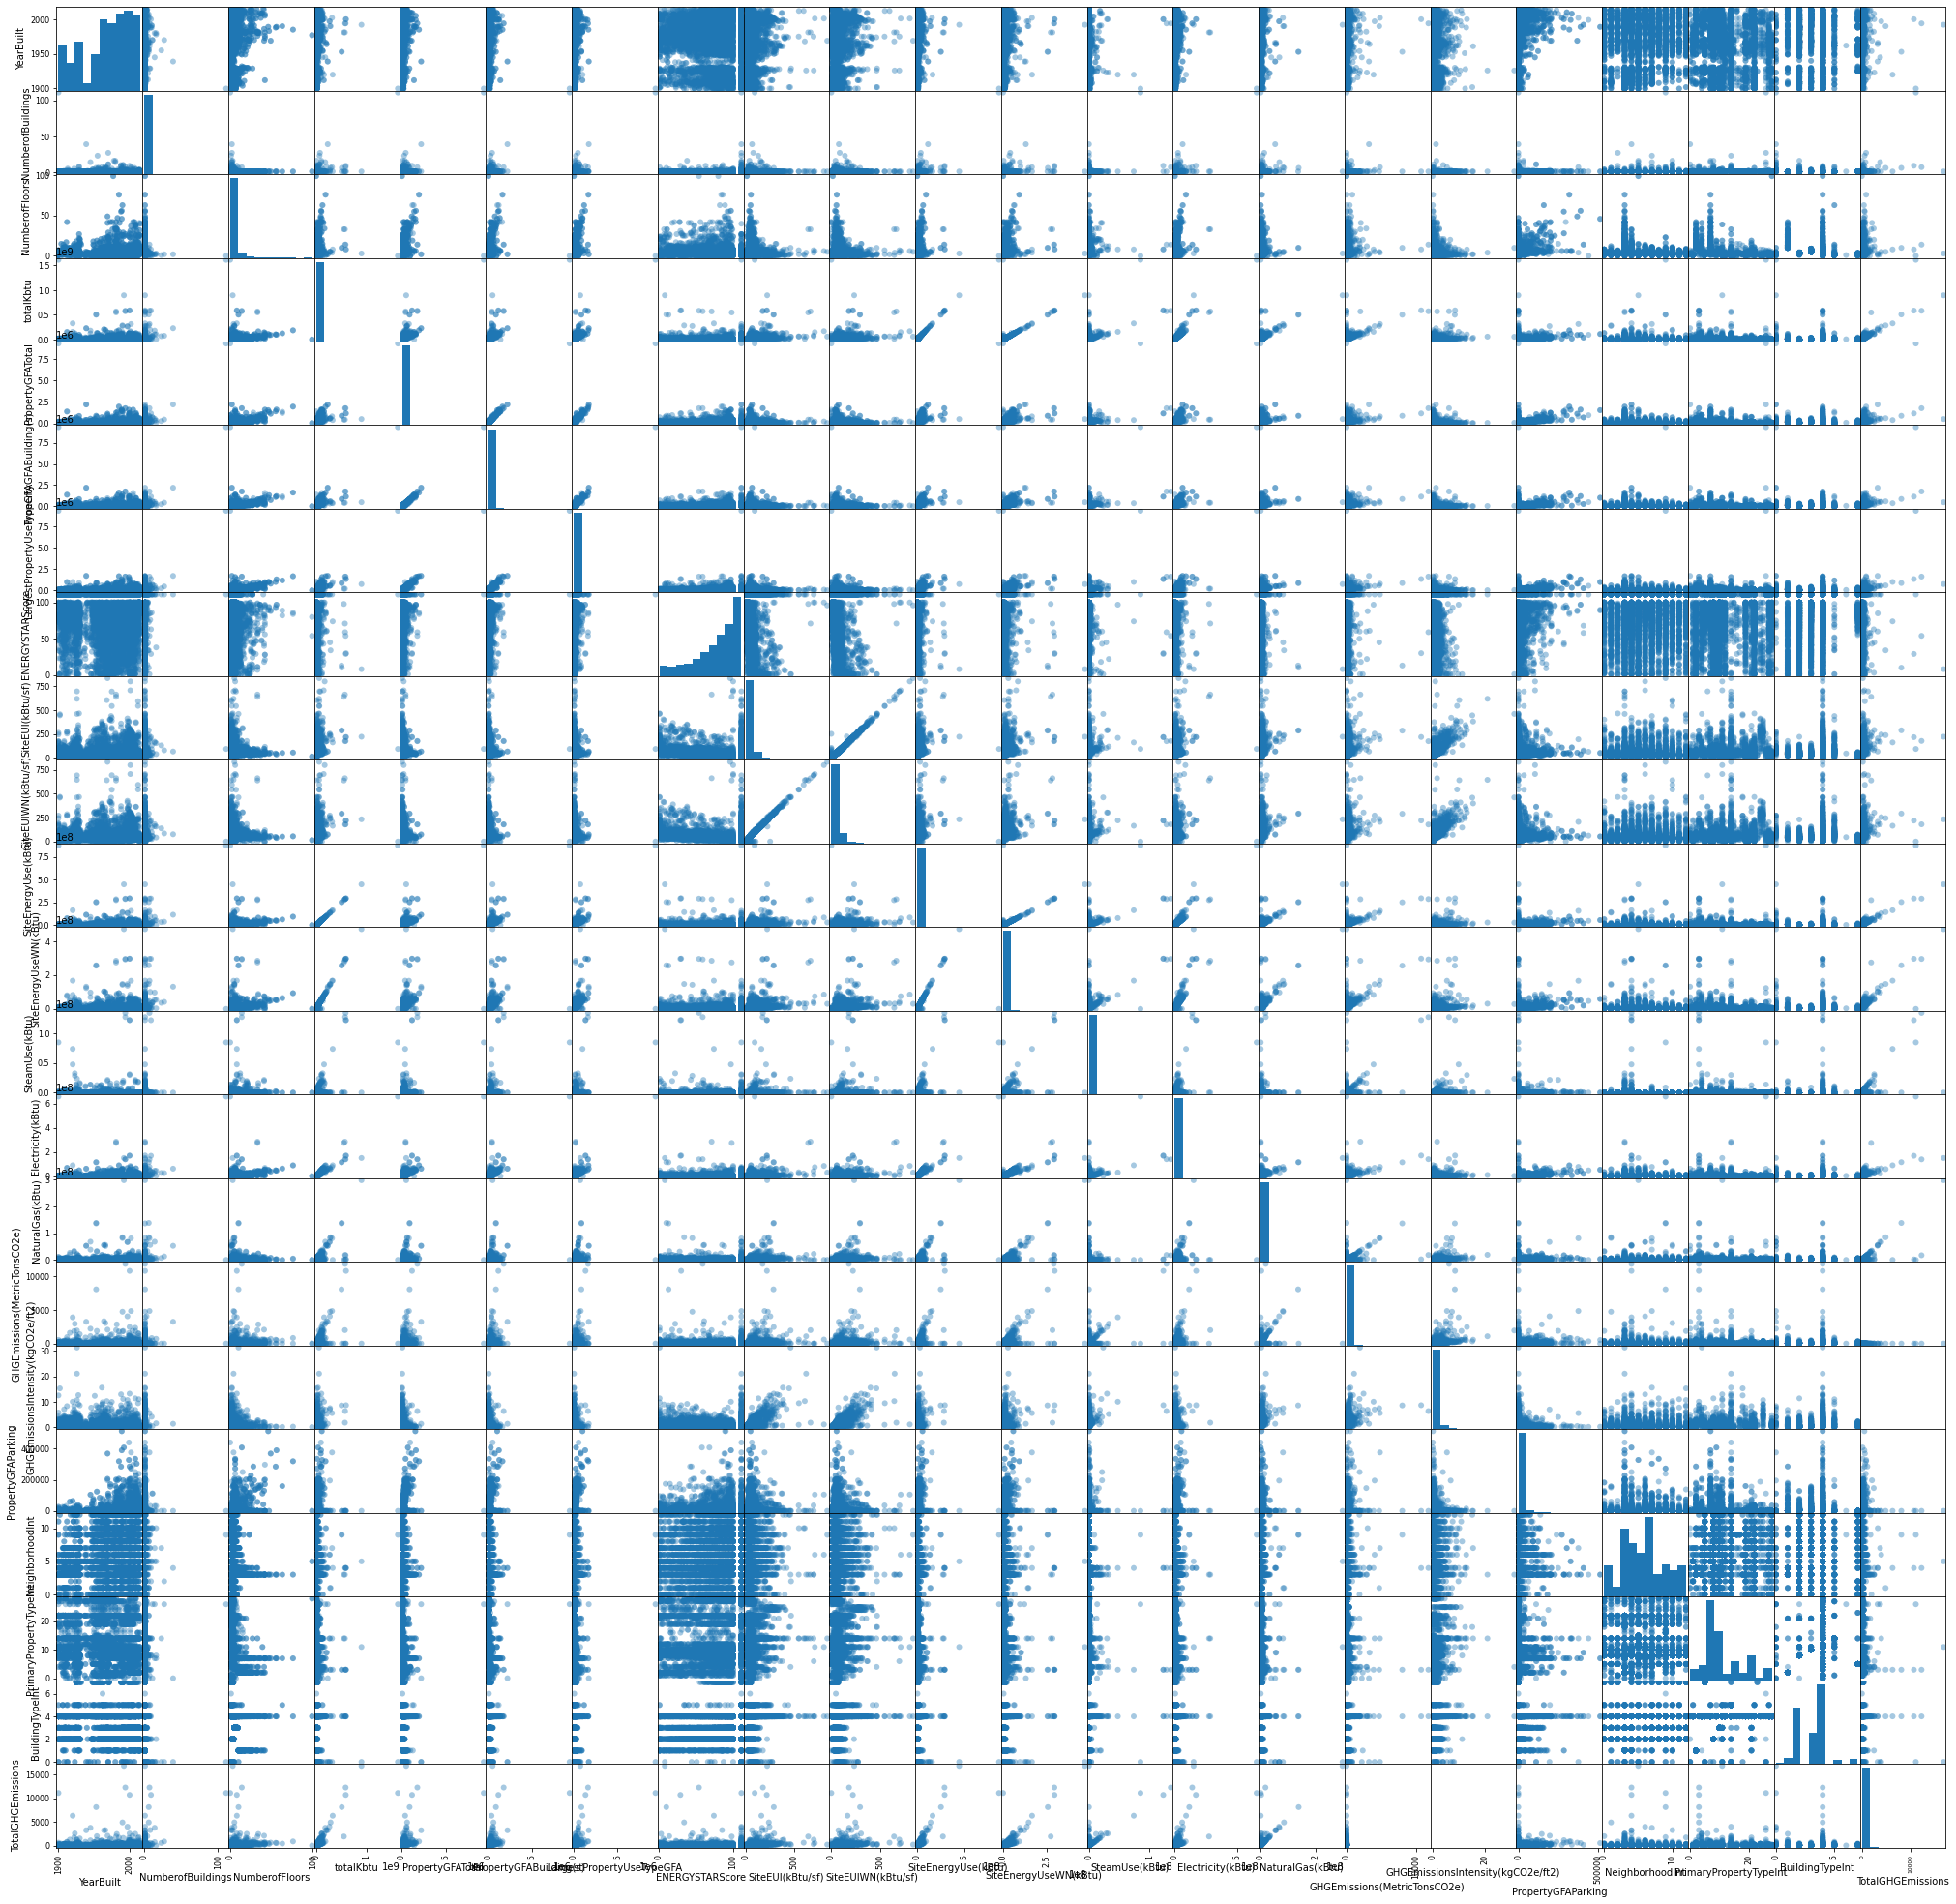

In [949]:
#c=list(filteredDF["ENERGYSTARScoreColor"].values

print(cleanDataF['ENERGYSTARScoreColor'].value_counts())
filter = ['YearBuilt', 
          'NumberofBuildings', 
          'NumberofFloors', 
          "totalKbtu",
          'PropertyGFATotal',
          'PropertyGFABuilding(s)', 
          'LargestPropertyUseType',
          'LargestPropertyUseTypeGFA', 
          #'ThirdLargestPropertyUseType', 
          #'ThirdLargestPropertyUseTypeGFA', 
          #'YearsENERGYSTARCertified', 
          'ENERGYSTARScore', 
          'SiteEUI(kBtu/sf)', 
          'SiteEUIWN(kBtu/sf)', 
          #'SourceEUI(kBtu/sf)', 
          #'SourceEUIWN(kBtu/sf)', 
          'SiteEnergyUse(kBtu)', 
          'SiteEnergyUseWN(kBtu)', 
          'SteamUse(kBtu)',
          'Electricity(kBtu)',
         #'NaturalGas(therms)',
          'NaturalGas(kBtu)',
          #'OtherFuelUse(kBtu)',
          'GHGEmissions(MetricTonsCO2e)',
          'GHGEmissionsIntensity(kgCO2e/ft2)',
          #'ComplianceStatus', 
          #'Address', 
          'City',
          'State',
          "Location", 
          #'GHGEmissionsIntensity', 
          "PrimaryPropertyType", 
          "PropertyGFAParking", 
          #"ListOfAllPropertyUseTypes", 
          'Neighborhood', 
          'NeighborhoodInt',
          'BuildingType', 
          'PrimaryPropertyTypeInt',
          'BuildingTypeInt',
          'ENERGYSTARScoreColor',
          'TotalGHGEmissions']
filteredDF = cleanDataF.filter(items=filter)
print(filteredDF["GHGEmissions(MetricTonsCO2e)"].value_counts())
print(filteredDF.shape[0])
g = pd.plotting.scatter_matrix(filteredDF, 
                               #c=list(filteredDF["ENERGYSTARScoreColor"]), 
                               figsize=(35,35),  marker = '°',  alpha = 0.4)
#figure = g[0,0].get_figure()
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()
#figure.savefig("./Visuals/originalScatterMatrix.jpg")

In [950]:
filteredDF.to_csv("filteredDF.csv")
nonNullRateFrame.to_csv("nonNullFrame.csv")

In [942]:
filteredDF.shape

(6716, 26)

In [936]:
import plotly.express as px
fig = px.scatter_matrix(filteredDF,
    #dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="ENERGYSTARScoreColor", 
    #symbol="species",                     
    #title="Scatter matrix of iris data set",
    labels={col:col.replace('_', ' ') for col in filteredDF.columns}) # remove underscore
fig.update_layout(width=1000, height=1000)
fig.update_xaxes(
        tickangle = 90,
        title_font = {"size": 5})
fig.update_yaxes(
        tickangle = 90,
        title_font = {"size": 5})
fig.show()

In [582]:
import sklearn.linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

In [638]:
#y = LabelEncoder().fit_transform(filteredDF["ENERGYSTARScoreColor"])
## StandarScarler maake a continuous variable
y_std = StandardScaler().fit_transform(filteredDF["TotalGHGEmissions"].values.reshape(-1, 1))
#LabelEncoder make a multiclass value
y_labeled = LabelEncoder().fit_transform(filteredDF["TotalGHGEmissions"].values)

columnToKeep = ["NeighborhoodInt", "Electricity(kBtu)", "PrimaryPropertyTypeInt", "BuildingTypeInt", "PropertyGFABuilding(s)", "NumberofBuildings", "NumberofFloors", "YearBuilt"]
stdScaler = StandardScaler()
X = filteredDF.filter(items=columnToKeep).values
X = stdScaler.fit_transform(X)


In [631]:
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)
#with label 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_labeled, train_size=0.7)

In [632]:
from sklearn import svm, metrics
classifier = svm.SVC(kernel="rbf", gamma=0.01)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.0

In [633]:
len(y_labeled)

19

In [634]:
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(gamma=0.01, kernel="rbf", alpha=1)
predicteur.fit(X_train, y_train)
Y_pred = predicteur.predict(X_test)
score = predicteur.score(X_test, y_test)
print(score)
rmse = np.sqrt(metrics.mean_squared_error(y_test, Y_pred))
print("RMSE : {:.2f}".format(rmse))

-1.6364353472122408
RMSE : 5.60


In [635]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
params_grid = {"alpha": list(np.linspace(0.0001,1, 5)) , "hidden_layer_sizes": list(range(1, 100, 5)), "solver": ["lbfgs", "sgd", "adam"], "activation" : ["identity", "logistic", "tanh", "relu"]}
perceptCVMLP = model_selection.GridSearchCV(MLPClassifier(max_iter=2000), params_grid, cv=3)
perceptCVMLP.fit(X_train, y_train)

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.250075, 0.50005,
                                   0.7500249999999999, 1.0],
                         'hidden_layer_sizes': [1, 6, 11, 16, 21, 26, 31, 36,
                                                41, 46, 51, 56, 61, 66, 71, 76,
                                                81, 86, 91, 96],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [636]:
perceptCVMLP.best_params_

{'activation': 'identity',
 'alpha': 0.0001,
 'hidden_layer_sizes': 1,
 'solver': 'sgd'}

In [637]:
perceptCVMLP.best_score_

0.25

In [630]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

<ipython-input-630-d2af3c60e736>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


ValueError: Unknown label type: 'continuous'

In [557]:
ypred = classifier.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))

In [558]:
outAccuracy2 = metrics.accuracy_score(y_test, ypred)
print("Accuracy 2", outAccuracy2)

Accuracy 2 0.8687415426251691


In [596]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse)

0.9764576745449283
